<a href="https://colab.research.google.com/github/sridharsakkari/sree/blob/master/Computer_Vision_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support


from keras.models import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.utils import to_categorical,plot_model
from keras.optimizers import Adam,SGD
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model,load_model

import zipfile
from zipfile import ZipFile

import os
import glob
from PIL import Image

from google.colab import drive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
train = ZipFile(os.getcwd()+'/drive/My Drive/train.zip','r')

In [0]:
train.extractall(path = os.getcwd())

In [0]:
train_data = pd.read_csv('train.csv')

In [5]:
train_data.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


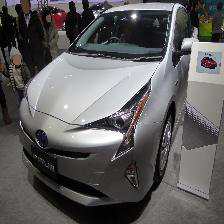

In [6]:
# Image sample
Image.open(r'images/1503.jpg')

In [0]:
image_data = os.listdir('images')

In [8]:
image_data[0:5]

['443.jpg', '948.jpg', '1768.jpg', '1272.jpg', '2254.jpg']

In [9]:
# sample image array 
img_sample = np.asarray(Image.open(r'images/1513.jpg'))
img_sample.shape

(224, 224, 3)

In [0]:
m = train_data.shape[0]  # number of train examples
nX = img_sample.shape[0]
nY = img_sample.shape[1]
nC = img_sample.shape[2]

In [0]:
# convert all images in train_data to arrays (3D)

train_array = np.zeros((m,nX,nY,nC))
idx_train = train_data.index

for i in range(m):

  train_array[i,:,:,:] = np.asarray(Image.open(r'images/'+train_data['image_names'][i]),dtype = np.float32)


In [0]:
label_map = {1 : 'Emergency',0:'Non_Emergency'}
classes = train_data['emergency_or_not'].map(label_map)

the displayed image is classified as label=  1 So the vehicle is Emergency


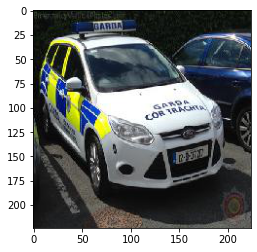

In [13]:
idx = 65
plt.imshow(train_array[idx,:,:,:].astype(np.uint8))
print('the displayed image is classified as label= ', train_data['emergency_or_not'][idx], 'So the vehicle is', classes[idx])

In [0]:
labels_train_data = train_data.pop('emergency_or_not')

In [0]:
train_array_scaled = (train_array/255.0).astype('float32')

In [0]:
# train_test_split

X_train,X_val,Y_train,Y_val = train_test_split(train_array_scaled,labels_train_data,test_size = 0.10)

In [0]:
Y_train = np.array(Y_train).reshape(-1,1)
Y_val = np.array(Y_val).reshape(-1,1)

In [0]:
f= 3  #kernel size
s=1  #strides 

In [0]:
#model definition

def conv_model2D(X1,f,s):

  np.random.seed(0)

  (nX,nY,nC) = X1.shape[1:]

  X_input = Input((nX,nY,nC))  #input tensor

  X = Conv2D(64,(f,f),padding = 'valid',strides = (s,s),activation = 'relu',kernel_initializer = 'he_uniform',
             bias_initializer = 'zeros',name = 'Ip_Layer',input_shape = (nX,nY,nC))(X_input)

  X = MaxPooling2D(pool_size = (2,2),padding = 'valid',name = 'MaxPool1')(X)

  X = Conv2D(64,(f,f),padding = 'valid',strides = (s,s),activation = 'relu',kernel_initializer = 'he_uniform',
             bias_initializer = 'zeros',name = '2nd_Layer')(X)

  X = MaxPooling2D(pool_size = (2,2),padding = 'valid',name = 'MaxPool2')(X)
  X = Conv2D(64,(f,f),padding = 'valid',strides = (s,s),activation = 'relu',kernel_initializer = 'he_uniform',
             bias_initializer = 'zeros',name = '3rd_Layer')(X)

  X = MaxPooling2D(pool_size = (2,2),padding = 'valid',name = 'MaxPool3')(X)

  X = Flatten()(X)

  X = Dense(100,activation = 'relu',use_bias = True,kernel_initializer = 'he_uniform',bias_initializer = 'zeros',name = 'FC1')(X)

  X = Dense(80,activation = 'relu',use_bias = True,kernel_initializer = 'he_uniform',bias_initializer = 'zeros',name = 'FC2')(X)

  X = Dense(1,activation='sigmoid',use_bias = True,kernel_initializer = 'he_uniform',name = 'Op_Layer')(X)


  return X_input,X



Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
Ip_Layer (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 111, 111, 64)      0         
_________________________________________________________________
2nd_Layer (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
MaxPool2 (MaxPooling2D)      (None, 54, 54, 64)        0         
_________________________________________________________________
3rd_Layer (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
MaxPool3 (MaxPooling2D)      (None, 26, 26, 64)        0   

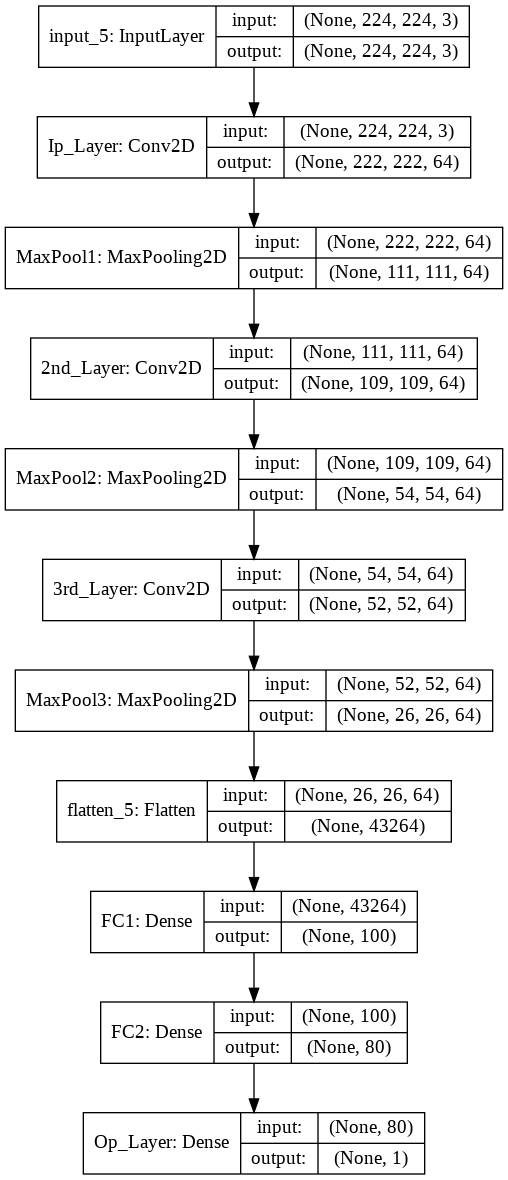

In [82]:
X_input,X = conv_model2D(X_train,f,s)

model = Model(inputs =X_input,outputs = X)

opt = SGD(learning_rate = 0.0001,momentum = 0.9)

model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])

model.summary()

plot_model(model, show_shapes=True, to_file='conv_model_vehicle_classfication.png')


Train on 1481 samples, validate on 165 samples
Epoch 1/20
1481/1481 [==============================] - 2s 2ms/step - loss: 0.7080 - accuracy: 0.5922 - val_loss: 0.6199 - val_accuracy: 0.7152
Epoch 2/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.6036 - accuracy: 0.6779 - val_loss: 0.6069 - val_accuracy: 0.6788
Epoch 3/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.5814 - accuracy: 0.6887 - val_loss: 0.6350 - val_accuracy: 0.6000
Epoch 4/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.5350 - accuracy: 0.7400 - val_loss: 0.6054 - val_accuracy: 0.6788
Epoch 5/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.4988 - accuracy: 0.7765 - val_loss: 0.4880 - val_accuracy: 0.7758
Epoch 6/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.5022 - accuracy: 0.7616 - val_loss: 0.6540 - val_accuracy: 0.6242
Epoch 7/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.4951 - accu

Text(0, 0.5, 'loss')

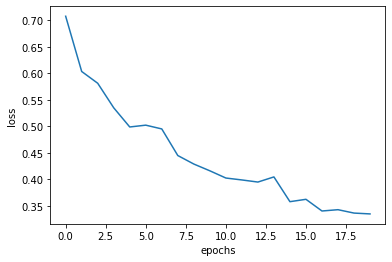

In [83]:
history = model.fit(X_train,Y_train,epochs = 20,batch_size = 32,validation_data=(X_val, Y_val))
model.save('model_conv_vehicle_classification.h5')
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [0]:
predictions = model.predict(X_val);
pred = [round(x[0]) for x in predictions]  

In [61]:
precision_recall_fscore_support(Y_val, pred,average = 'weighted')

(0.8590566534914361, 0.8484848484848485, 0.8435237167631533, None)

In [0]:
image_data_df = pd.DataFrame(image_data,columns = ['image_data'])

In [0]:
test_imgs = image_data_df[~image_data_df.image_data.isin(train_data.image_names)]

In [0]:
test_idx = test_imgs.index

In [0]:
m_test = len(test_idx)

In [0]:
test_image_array = np.zeros((m_test,nX,nY,nC))

In [0]:
for i in range(m_test):

  test_image_array[i,:,:,:] = np.asarray(Image.open(r'images/'+test_imgs['image_data'][test_idx[i]]),dtype = np.float32)

In [0]:
test_arr_scaled =  (test_image_array/255.0).astype('float32')

In [0]:
predictions_test = model.predict(test_arr_scaled);
pred_test = [round(x[0]) for x in predictions_test] 

In [0]:
trained_weights = model.trainable_weights
np.savetxt('weights_SGD.txt',(trained_weights),fmt='%5s')

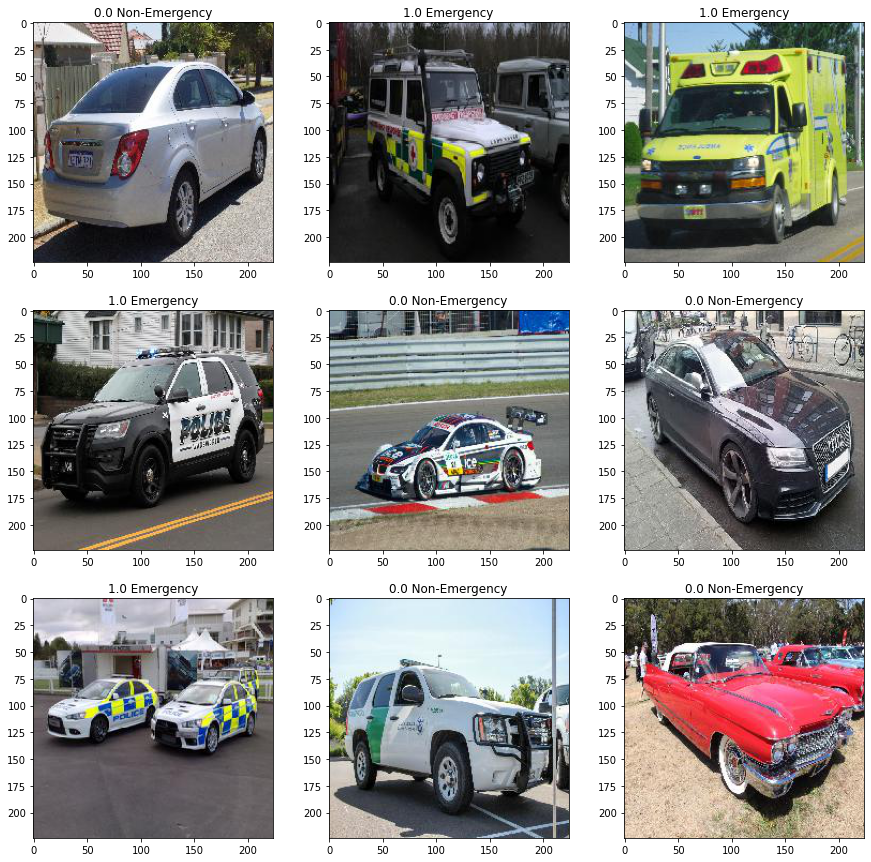

In [71]:
import random
test_classes = {1.0 : 'Emergency',0:'Non-Emergency'}

idx = random.sample(range(0,len(test_idx)),9)
fig,axs = plt.subplots(3,3,figsize = (15,15))
axs = axs.flatten()
for i in range(len(idx)):


  axs[i].imshow(test_image_array[idx[i],:,:].astype(np.uint8))
  axs[i].set_title(str(pred_test[idx[i]]) +' '+ test_classes[pred_test[idx[i]]])

  


In [72]:
test_imgs['emergency_or_not'] = pred_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
test_imgs
test_imgs.columns = ['image_names','emergency_or_not']


In [0]:
test_imgs.to_csv('submission_pred.csv',index = False)